In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isna().mean()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

## Dataset Splitting

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="MEDV")
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [82]:
X_train.to_csv("../data/X_train.csv")
y_train.to_csv("../data/y_train.csv")
X_test.to_csv("../data/X_test.csv")
y_test.to_csv("../data/y_test.csv")

## Pipeline

In [7]:
X_train.head().columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [9]:
num_pipe = Pipeline([
    ('impute', SimpleImputer())
])

cat_pipe = Pipeline([
    ('onehot', OneHotEncoder())
])

prepocessor = ColumnTransformer([
    ('numeric', num_pipe, ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 
                       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']),
    ('categoric', cat_pipe, ['CHAS'])
])

## Making model with tunning

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [13]:
pipeline = Pipeline([
    ('prep', prepocessor),
    ('algo', RandomForestRegressor(n_jobs=-2, random_state=42))
])

In [42]:
parameter = {
    "algo__n_estimators":[100, 150, 200],
    "algo__max_depth":[20, 50, 80],
    "algo__max_features":[0.3, 0.6, 0.8],
    "algo__min_samples_leaf":[1, 5, 10]
}

model = GridSearchCV(pipeline, parameter, n_jobs=-1, cv=3)
model.fit(X_train, y_train)

print(f"Model Best Parameter: {model.best_params_}")
print("")
print(f"Best CV Score in Gridsearch: {model.best_score_}")
print(f"Train Score: {model.score(X_train, y_train)}")
print(f"Test Score: {model.score(X_test, y_test)}")

Model Best Parameter: {'algo__max_depth': 50, 'algo__max_features': 0.3, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 100}

Best CV Score in Gridsearch: 0.8350287025329336
Train Score: 0.981371801711765
Test Score: 0.8683849624074343


Kelihatannya model mengalami overfit

## Feature importance

In [61]:
from jcopml.feature_importance import mean_loss_decrease

,feature,importance
4,RM,0.293966
11,LSTAT,0.275359
9,PTRATIO,0.079866
6,DIS,0.065831
3,NOX,0.064714
0,CRIM,0.061490
2,INDUS,0.045710
8,TAX,0.030307
5,AGE,0.025181
10,B,0.022110


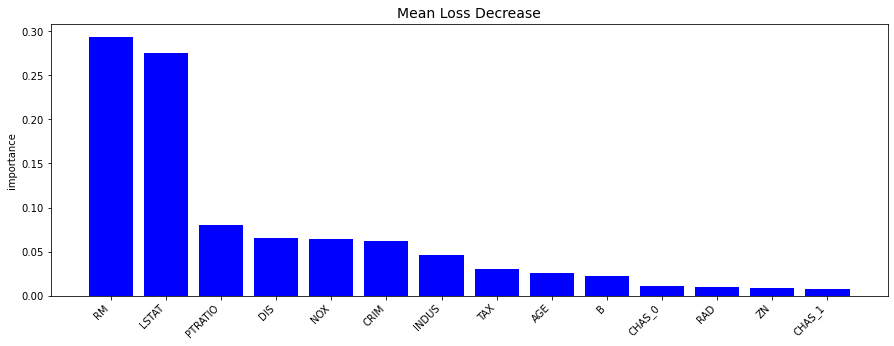

In [63]:
df_imp = mean_loss_decrease(X_train, model, plot=True)
df_imp

In [70]:
list(df_imp[:6].feature)

['RM', 'LSTAT', 'PTRATIO', 'DIS', 'NOX', 'CRIM']

In [71]:
num_pipe = Pipeline([
    ('impute', SimpleImputer())
])

cat_pipe = Pipeline([
    ('onehot', OneHotEncoder())
])

prepocessor = ColumnTransformer([
    ('numeric', num_pipe, ['RM', 'LSTAT', 'PTRATIO', 'DIS', 'NOX', 'CRIM']),
    ('categoric', cat_pipe, ['CHAS'])
])

In [72]:
pipeline = Pipeline([
    ('prep', prepocessor),
    ('algo', RandomForestRegressor(n_jobs=-2, random_state=42))
])

In [73]:
parameter = {
    "algo__n_estimators":[100, 150, 200],
    "algo__max_depth":[20, 50, 80],
    "algo__max_features":[0.3, 0.6, 0.8],
    "algo__min_samples_leaf":[1, 5, 10]
}

model = GridSearchCV(pipeline, parameter, n_jobs=-1, cv=3)
model.fit(X_train, y_train)

print(f"Model Best Parameter: {model.best_params_}")
print("")
print(f"Best CV Score in Gridsearch: {model.best_score_}")
print(f"Train Score: {model.score(X_train, y_train)}")
print(f"Test Score: {model.score(X_test, y_test)}")

Model Best Parameter: {'algo__max_depth': 20, 'algo__max_features': 0.3, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 150}

Best CV Score in Gridsearch: 0.8325269498047184
Train Score: 0.9800990089702017
Test Score: 0.860474508222245


## Fine tunning with RandomizedSearchCV

In [74]:
import numpy as np
from scipy import stats

In [75]:
class Integer:
    def __init__(self, low, high):
        self.high = high
        self.low = low
        
    def rvs(self, random_state):
        rand_int = stats.randint(low=self.low, high=self.high+1)
        return rand_int.rvs(random_state=random_state)
    
class Real:
    def __init__(self, low, high):
        self.low = low
        self.high = high
        
    def rvs(self, random_state):
        uniform = self._inclusive_uniform(loc=self.low, scale=self.high-self.low)
        return uniform.rvs(random_state=random_state)
    
    @staticmethod
    def _inclusive_uniform(loc, scale):
        return stats.uniform(loc=loc, scale=np.nextafter(scale, scale+1))

In [78]:
parameter = {
    "algo__n_estimators":Integer(140, 160),
    "algo__max_depth":Integer(15, 30),
    "algo__max_features":Real(0.5, 0.8),
    "algo__min_samples_leaf":Integer(1, 3)
}

model = RandomizedSearchCV(pipeline, parameter, n_iter=50, cv=3, random_state=42, verbose=1)
model.fit(X_train, y_train)
print(f"Model Best Parameter: {model.best_params_}")

print("")
print(f"Best CV Score in Gridsearch: {model.best_score_}")
print(f"Train Score: {model.score(X_train, y_train)}")
print(f"Test Score: {model.score(X_test, y_test)}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Model Best Parameter: {'algo__max_depth': 18, 'algo__max_features': 0.6090888807137882, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 159}

Best CV Score in Gridsearch: 0.8301229606545633
Train Score: 0.9797209588870881
Test Score: 0.8727143882057127


## Save model

In [80]:
import pickle

In [81]:
pickle.dump(model, open("../model/model.pkl", "wb"))

In [79]:
m = model.best_estimator_